In [ ]:
#1. Set Up Google Colab and Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#2. Load  the Data
from google.colab import files
uploades = files.upload()

Saving shopping_behavior_updated.csv to shopping_behavior_updated (1).csv


In [ ]:
df1 = pd.read_csv('shopping_behavior_updated.csv')

In [ ]:
#3.Preprocessing
# Example: Select relevant features
features = ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Review Rating']
# Add more numerical/encoded categorical columns as relevant for clustering

# Encode categorical columns if needed
df1_encoded = pd.get_dummies(df1, columns=['Gender', 'Category', 'Subscription Status', 'Shipping Type', 'Payment Method'], drop_first=True)
X = df1_encoded[features].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

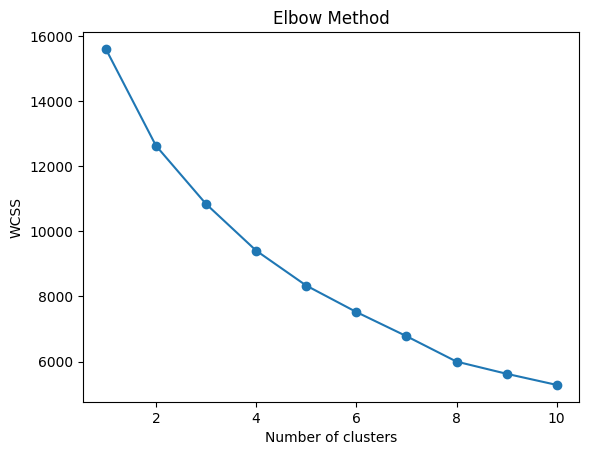

In [ ]:
#4. K-Means Clustering
# Elbow method to find optimal k
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose optimal k, e.g., k=4
kmeans = KMeans(n_clusters=4, random_state=42)
df1['Cluster'] = kmeans.fit_predict(X_scaled)



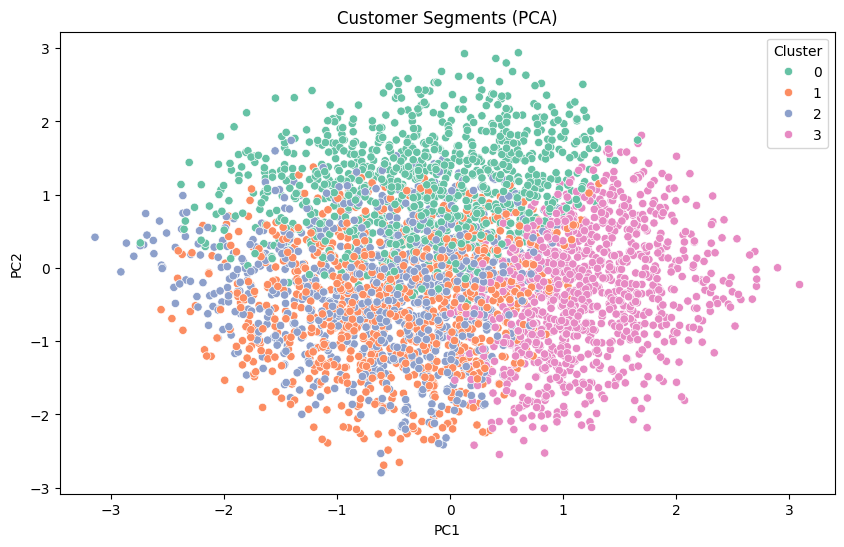

In [ ]:
#5. PCA for Visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df1['PC1'] = principal_components[:, 0]
df1['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set2', data=df1)
plt.title('Customer Segments (PCA)')
plt.show()

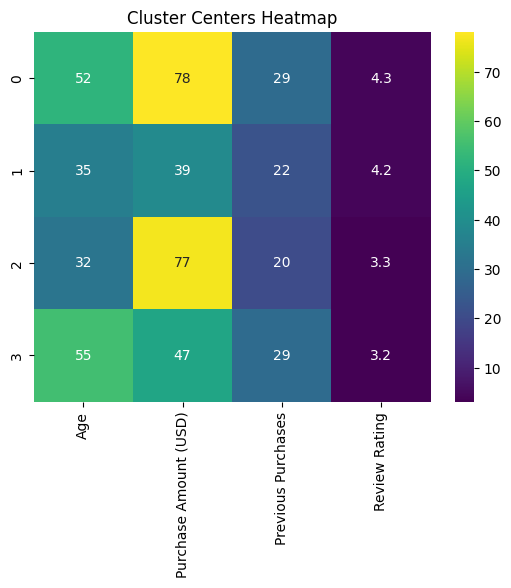

In [ ]:
#6. Heatmap of Cluster Centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
df_centers = pd.DataFrame(cluster_centers, columns=features)
sns.heatmap(df_centers, annot=True, cmap='viridis')
plt.title('Cluster Centers Heatmap')
plt.show()